In [95]:
from sklearn import datasets
from sklearn.model_selection import KFold, train_test_split
from sklearn.linear_model import Lasso, LassoCV, Ridge, ElasticNet, LinearRegression
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

In [93]:
data = sklearn.datasets.load_diabetes()

In [58]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [90]:
# X, y = df.drop('target', axis=1), df['target']
# No need to convert to dataframe
X, y = data.data, data.target

In [68]:
kf = KFold(n_splits=5, shuffle=True, random_state = 0)

In [99]:
alphalist = 10**(np.linspace(-3,0,2000))

err_vec_val = np.zeros(len(alphalist))
err_vec_val_ridge = np.zeros(len(alphalist))
err_vec_val_elastic = np.zeros(len(alphalist))
err_vec_val_base = np.zeros(len(alphalist))



for i, curr_alpha in enumerate(alphalist):
    lasso = Lasso(alpha = curr_alpha)
    ridge_lr = Ridge(alpha = curr_alpha)
    elastic_lr = ElasticNet(alpha = curr_alpha)
    base_lr = LinearRegression()

    total_error = 0
    total_error_ridge = 0
    total_error_elastic = 0
    total_error_base = 0
    
    for train_ind, val_ind in kf.split(X, y):
        X_train, y_train = X[train_ind], y[train_ind]
        X_val, y_val = X[val_ind], y[val_ind]
        
        lasso.fit(X_train, y_train)
        ridge_lr.fit(X_train, y_train)
        elastic_lr.fit(X_train, y_train)
        base_lr.fit(X_train, y_train)
        
        val_pred_lasso = lasso.predict(X_val)
        val_pred_ridge = ridge_lr.predict(X_val)
        val_pred_elastic = elastic_lr.predict(X_val)
        val_pred_base = base_lr.predict(X_val)
        
        
        test_error = np.sqrt(np.mean((val_pred_lasso - y_val)**2))
        total_error += test_error
        total_error_ridge += np.sqrt(np.mean((val_pred_ridge - y_val)**2))
        total_error_elastic += np.sqrt(np.mean((val_pred_elastic - y_val)**2))
        total_error_base += np.sqrt(np.mean((val_pred_base - y_val)**2))
        
    err_vec_val[i] = total_error
    err_vec_val_ridge[i] = total_error_ridge
    err_vec_val_elastic[i] = total_error_elastic
    err_vec_val_base[i] = total_error_base
                
print(alphalist[np.argmin(err_vec_val)], ',', np.min(err_vec_val))
print(alphalist[np.argmin(err_vec_val_ridge)], ',', np.min(err_vec_val_ridge))
print(alphalist[np.argmin(err_vec_val_elastic)], ',', np.min(err_vec_val_elastic))
print(alphalist[np.argmin(err_vec_val_base)], ',', np.min(err_vec_val_base))

best_alpha = alphalist[np.argmin(err_vec_val)]

0.0387073907735 , 272.327839336
0.00502169608166 , 272.430348033
0.001 , 274.062970042
0.001 , 272.635362306


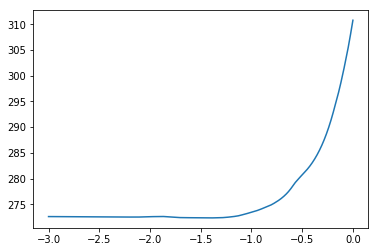

In [101]:
plt.plot(np.log10(alphalist),err_vec_val)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)


In [86]:
lasso = Lasso(alpha = best_alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=0.038573864143794066, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [89]:
list(zip(data.feature_names,lasso.coef_))

[('age', -8.618718135569063),
 ('sex', -211.04417126133509),
 ('bmi', 564.57804920213096),
 ('bp', 273.8757887295464),
 ('s1', -172.828394565743),
 ('s2', -0.0),
 ('s3', -222.10134135370814),
 ('s4', 15.862187807844451),
 ('s5', 565.45943038781149),
 ('s6', 30.994454624143629)]